In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
income = pd.read_csv("../Data/income.csv")

In [4]:
income['SalStat'].value_counts()

SalStat
less than or equal to 50,000    24283
greater than 50,000              7695
Name: count, dtype: int64

In [5]:
## Convert the SalStat column into binaty numeric
income['SalStat'] = (
    income["SalStat"].str.strip().map(
        {"less than or equal to 50,000":0,
         "greater than 50,000":1}
    )
)

income.head()

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,0
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,0
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,1
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,0
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,0


In [6]:
#Explore numeric features using histogram or boxplots
income.select_dtypes(include="number").columns

Index(['age', 'capitalgain', 'capitalloss', 'hoursperweek', 'SalStat'], dtype='object')

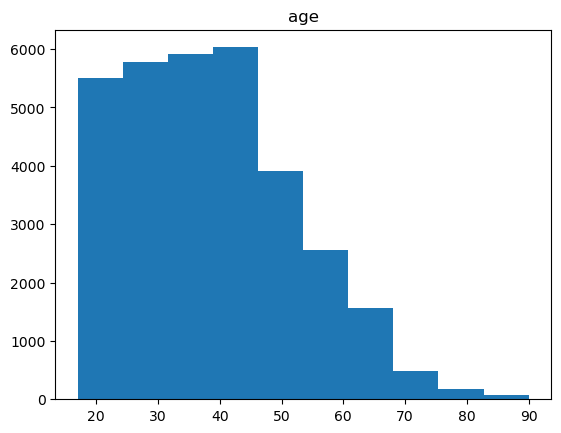

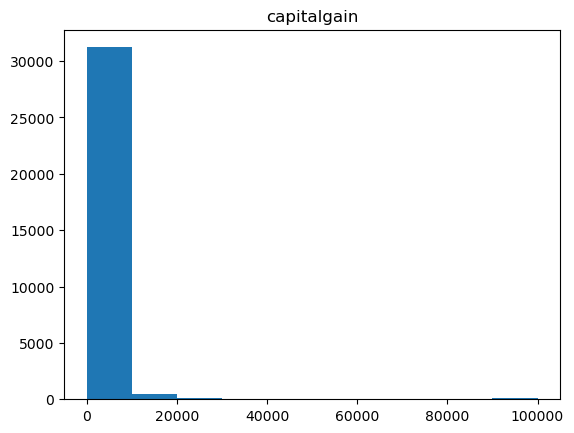

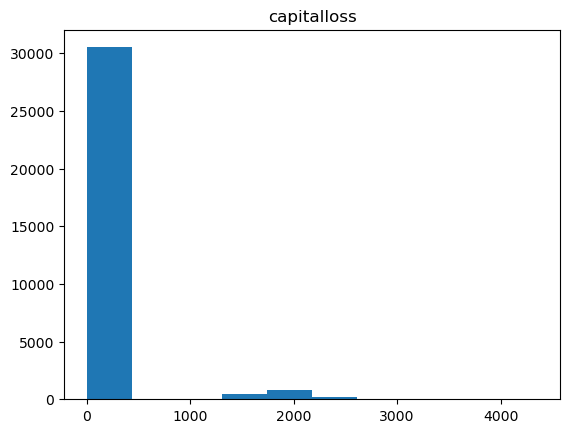

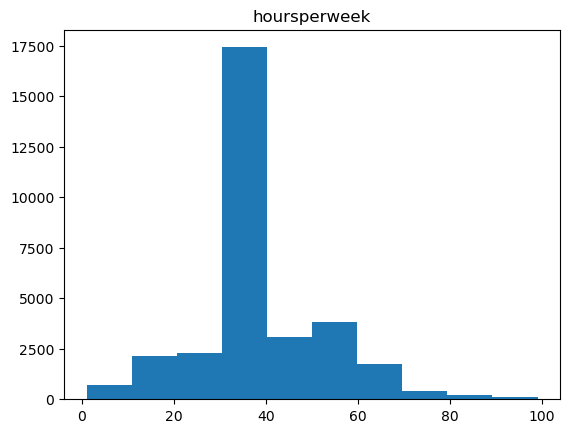

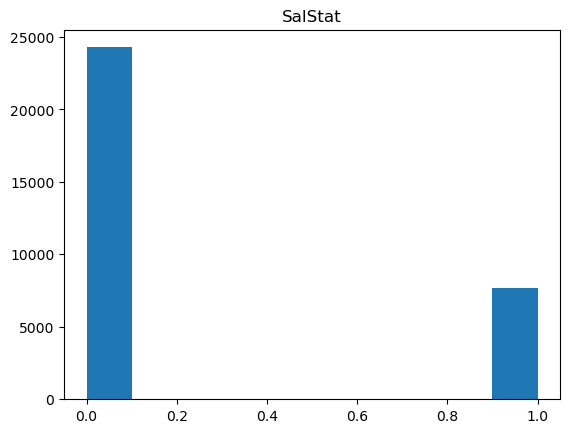

In [7]:
for col in income.select_dtypes(include="number"):
    plt.hist(income[col])
    plt.title(col)
    plt.show()

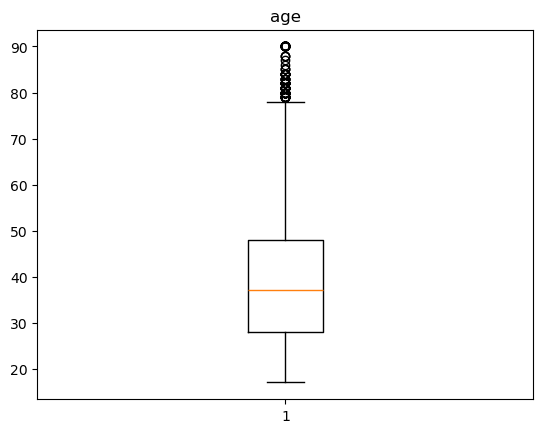

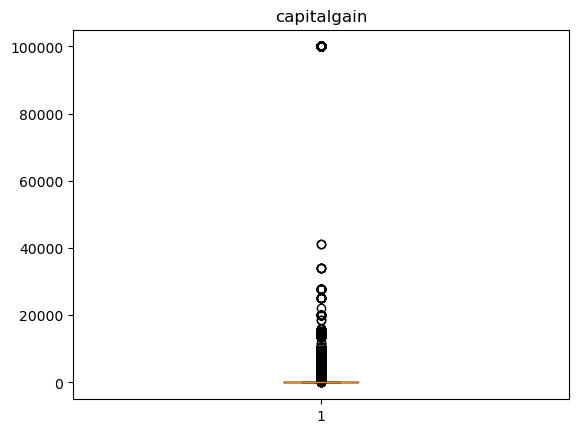

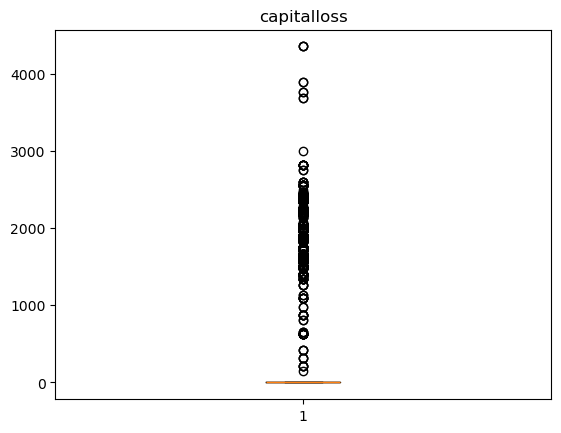

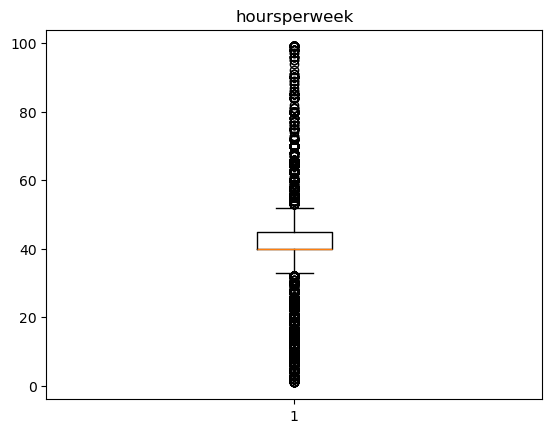

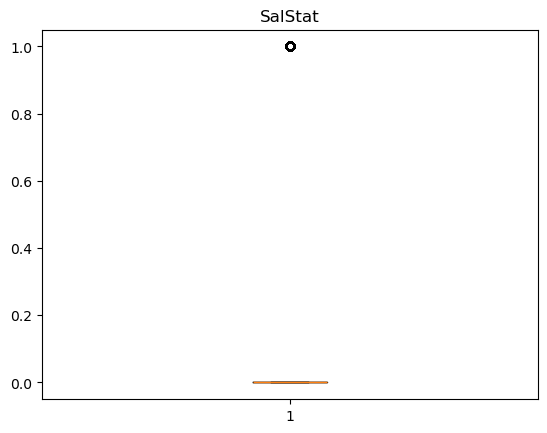

In [8]:
for col in income.select_dtypes(include="number").columns:
    plt.boxplot(income[col])
    plt.title(col)
    plt.show()

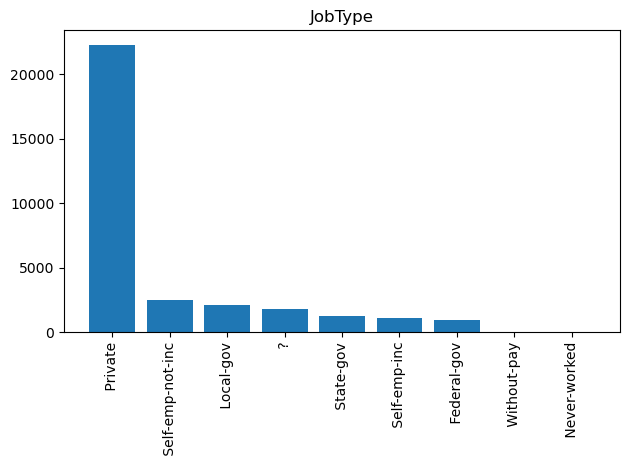

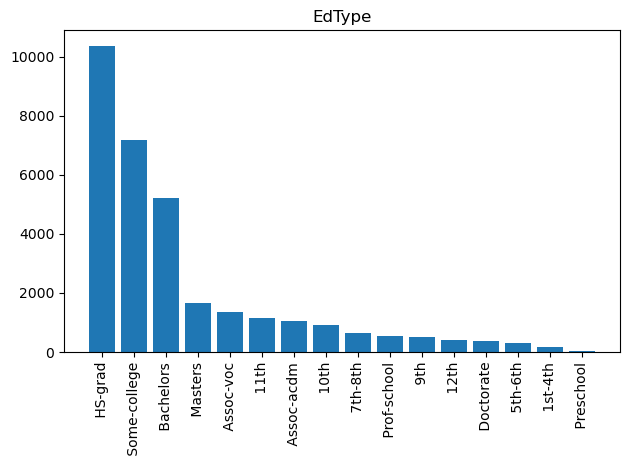

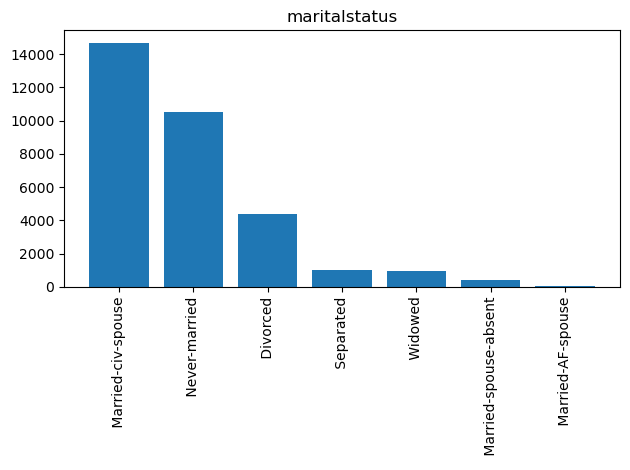

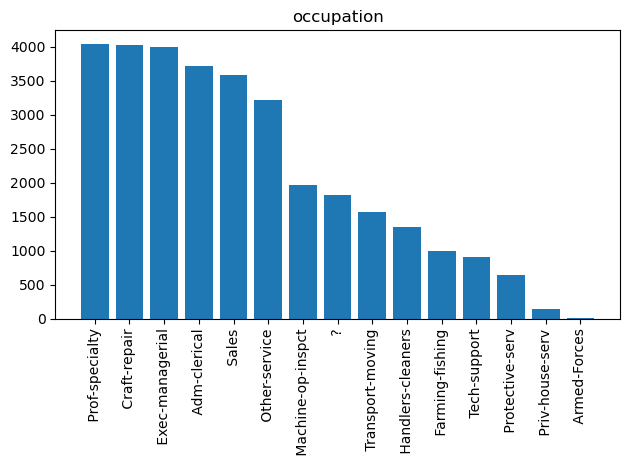

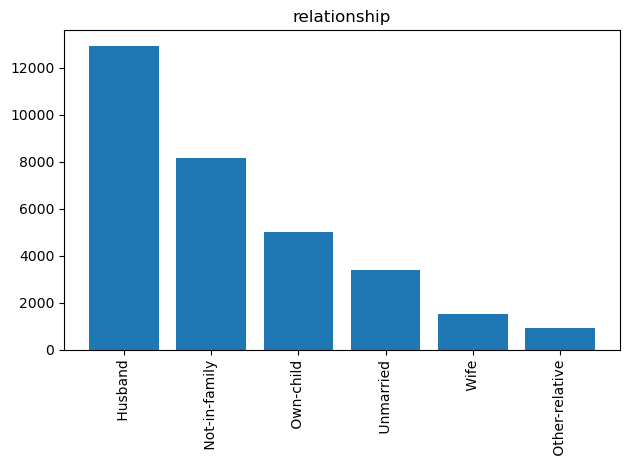

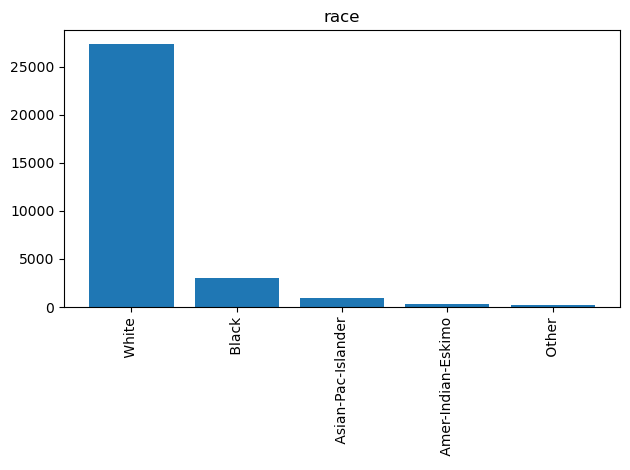

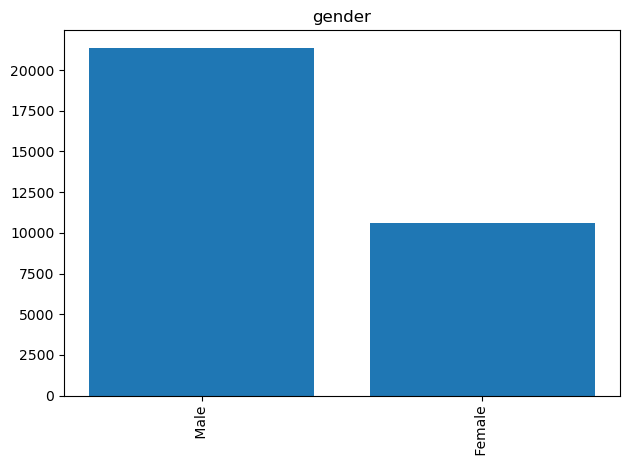

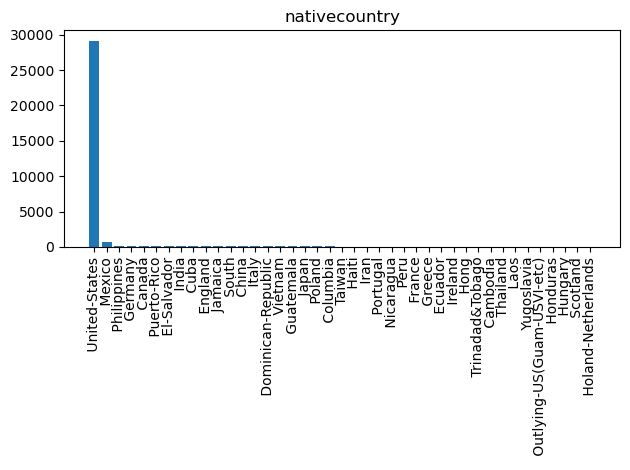

In [9]:
for col in income.select_dtypes("object").columns:
    counts=income[col].value_counts()
    plt.bar(counts.index,counts)
    plt.title(col)
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show();

### Feature-Feautre-Target Relationships

In [10]:
income.corr(numeric_only=True)

,age,capitalgain,capitalloss,hoursperweek,SalStat
age,1.000000,0.077490,0.057282,0.068299,0.233601
capitalgain,0.077490,1.000000,-0.031499,0.079112,0.222703
capitalloss,0.057282,-0.031499,1.000000,0.053106,0.149353
hoursperweek,0.068299,0.079112,0.053106,1.000000,0.230448
SalStat,0.233601,0.222703,0.149353,0.230448,1.000000


<Axes: >

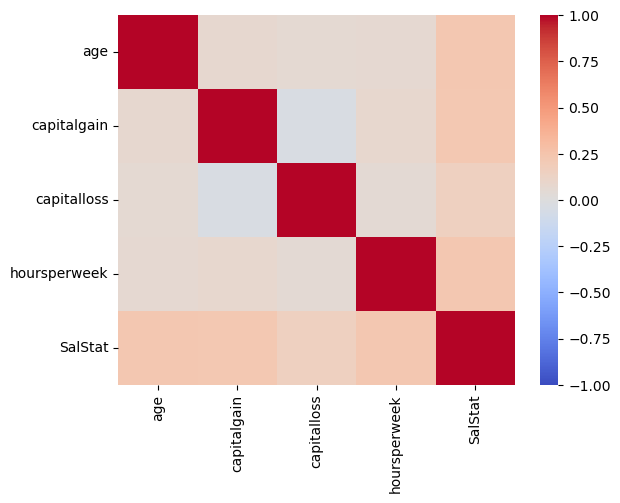

In [11]:
sns.heatmap(income.corr(numeric_only=True),vmin=-1,vmax=1,cmap='coolwarm')

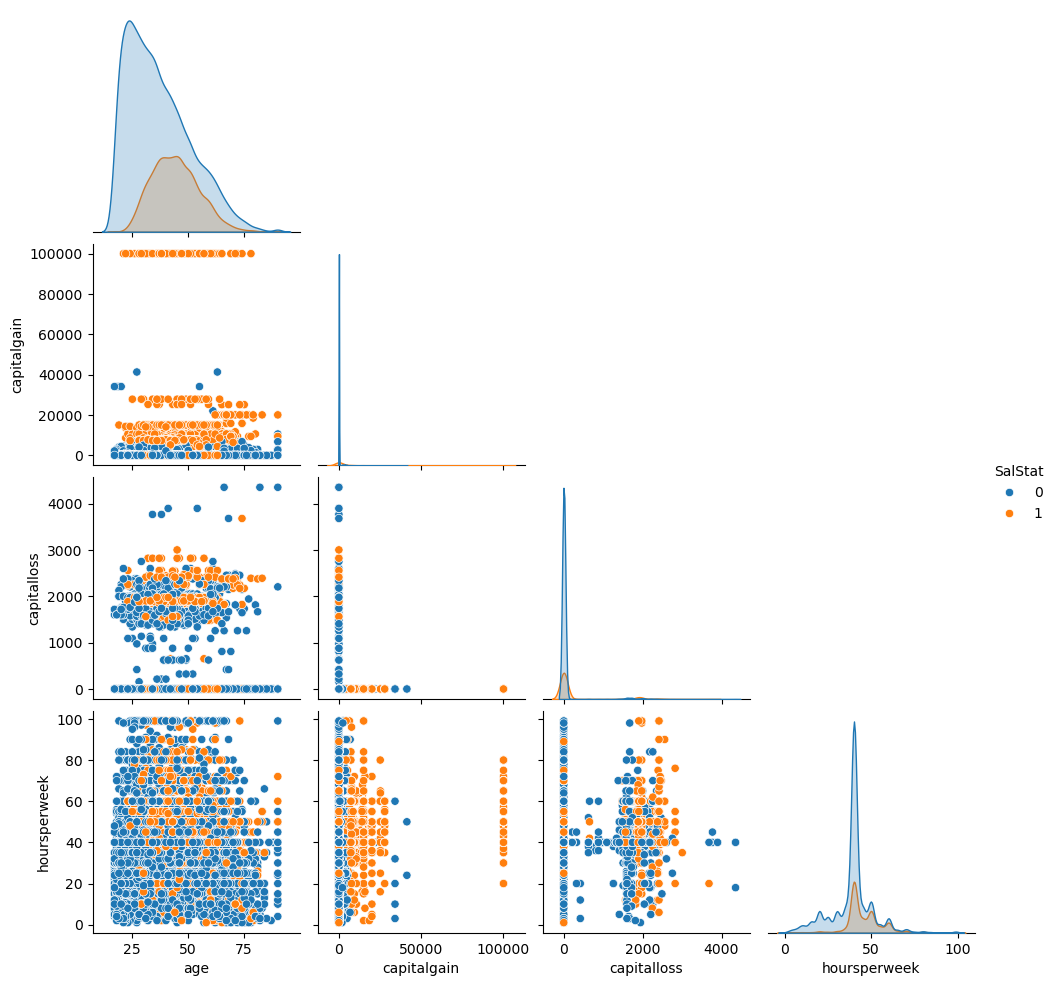

In [12]:

sns.pairplot(income,corner=True,hue="SalStat")

### Preparating Data for modelling

In [13]:
income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31978 entries, 0 to 31977
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            31978 non-null  int64 
 1   JobType        31978 non-null  object
 2   EdType         31978 non-null  object
 3   maritalstatus  31978 non-null  object
 4   occupation     31978 non-null  object
 5   relationship   31978 non-null  object
 6   race           31978 non-null  object
 7   gender         31978 non-null  object
 8   capitalgain    31978 non-null  int64 
 9   capitalloss    31978 non-null  int64 
 10  hoursperweek   31978 non-null  int64 
 11  nativecountry  31978 non-null  object
 12  SalStat        31978 non-null  int64 
dtypes: int64(5), object(8)
memory usage: 3.2+ MB


In [27]:
for col in income.select_dtypes("object").columns:
    print(income[col].value_counts())

JobType
Private             22286
Self-emp-not-inc     2499
Local-gov            2067
?                    1809
State-gov            1279
Self-emp-inc         1074
Federal-gov           943
Without-pay            21
Name: count, dtype: int64
EdType
HS-grad         10368
Some-college     7187
Bachelors        5210
Masters          1674
Assoc-voc        1366
11th             1167
Assoc-acdm       1055
10th              921
7th-8th           627
Prof-school       559
9th               506
12th              417
Doctorate         390
5th-6th           318
1st-4th           163
Preschool          50
Name: count, dtype: int64
maritalstatus
Married-civ-spouse       14692
Never-married            10488
Divorced                  4394
Separated                 1005
Widowed                    979
Married-spouse-absent      397
Married-AF-spouse           23
Name: count, dtype: int64
occupation
Prof-specialty       4038
Craft-repair         4030
Exec-managerial      3992
Adm-clerical         3721
S

In [26]:
#map holland-netherlands in nativecountry to Germany
#replace Never-worked by without-pay
#replace Armed-Forces by ?

income = income.assign(
                nativecountry = income["nativecountry"].str.replace(" Holand-Netherlands",
                                                         " Germany"),
                JobType = income["JobType"].replace({" Never-worked":" Without-pay"}),
                occupation = income["occupation"].str.replace(" Armed-Forces"," ?")
)


In [28]:
income = pd.get_dummies(income, drop_first=True)

In [37]:
income = income.rename({"SalStat_ less than or equal to 50,000":"target"},axis=1)

In [38]:
income.head()

,age,capitalgain,capitalloss,hoursperweek,JobType_ Federal-gov,JobType_ Local-gov,JobType_ Private,JobType_ Self-emp-inc,JobType_ Self-emp-not-inc,JobType_ State-gov,...,nativecountry_ Puerto-Rico,nativecountry_ Scotland,nativecountry_ South,nativecountry_ Taiwan,nativecountry_ Thailand,nativecountry_ Trinadad&Tobago,nativecountry_ United-States,nativecountry_ Vietnam,nativecountry_ Yugoslavia,target
0,45,0,0,28,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,True
1,24,0,0,40,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
2,44,0,0,40,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,27,0,0,40,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,20,0,0,35,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,True


In [41]:
X = income.drop("target",axis=1)
y = income["target"]

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)